**Anexo II B. Simulación de datos fMRI**

**José Pedro Manzano**

**Lenguaje: Matlab**

En este anexo se proporcionarán los pasos para generar datos 4D de fMRI a partir del config_file parametrizado en el  Anexo I. A.

Un tutorial mucho más detallado puede seguirse en: 

[http://mialab.mrn.org/software/simtb/documentation.html].

A partir del config_file se puede generar lo que se denomina como estructura de parámetros:

In [ ]:
sP = simtb_create_sP('experiment_params_block_mod');

Y con esta estructura ya podemos realizar la simulación:

In [ ]:
simtb_main(sP);

Esta orden generará automáticamente los datasets de cada sujeto por separado en el *outputh_path* que hayamos indicado en el config_file. Los datos de interés estarán en el fichero XXXX_SIM.mat.

Además de los ficheros de datos, se generan (y guardan) automáticamente un conjunto de figuras. Es recomendable comprobarlas para verificar que la simulación cumple los requisitos propuestos.

En este anexo cargaremos los resultados y las figuras directamente en lugar de volver a generarlas.

Un buen comienzo es representar las regiones (ICs) que hemos utilizado para la simulación:


ans = 

  Figure (1: simulation model) with properties:

      Number: 1
        Name: 'simulation model'
       Color: [0 0 0]
    Position: [486 72 467 719]
       Units: 'pixels'

  Use GET to show all properties



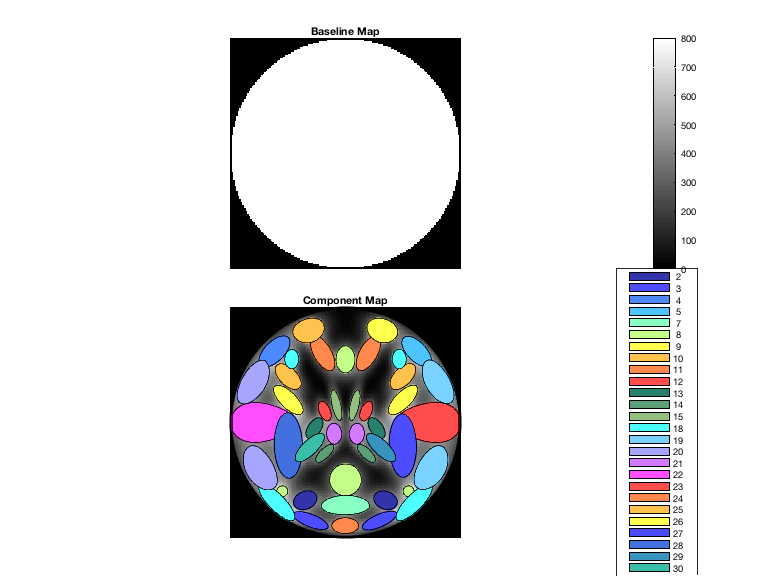

In [3]:
openfig('/Users/hose/Desktop/TFM_TECI/simulated_data/block_model.fig')

En la imagen anterior se puede observar que las regiones que corresponderían al CSF y a la sustancia blanca carecen de componente porque fueron eliminadas. También falta la componente frontal (IC6, sinus signal dropout). Es fácil identificar anatómicamente el resto de componentes, como por ejemplo las ICs 22 y 23, asociadas con la región sensori-motora o redes como la Default Mode Network, que se corresponde con las regiones de la IC8.

Como se comentaba, para cada sujeto hay un fichero XXXX_SIM.mat que contiene las series temporales simuladas (TC), la matriz de correlacion entre las series temporales de cada IC (cmTC), el mapa espacial de las ICs (SM) y una matriz de correlación espacial que refleja el solapamiento entre ICs (cmSM)

In [7]:
datos = load('/Users/hose/Desktop/TFM_TECI/simulated_data/block_subject_001_SIM.mat')


datos = 

  struct with fields:

      TC: [250x24 double]
      SM: [24x21904 double]
    cmTC: [24x24 double]
    cmSM: [24x24 double]



Una manera rápida de visualizar toda esta información es cargando la figura *XXX_subjectXXX.fig* generadas durante la simulación. 

En ella se muestra la TC de cada componente junto a su mapa espacial SM. Así se puede observar cómo las componentes S4, S5, S7, S8, S18, S22, S23, S24, S27 y S28 tienen la relación que se configuró para la simulación.

Este hecho se refleja de forma más evidente en la matriz de correlación situada en la parte inferior. A la derecha de esta matriz se encuentra la de correlación espacial, donde existe poco solapamiento entre ICs (como se puede ver en la primera figura de este anexo).

In [5]:
openfig('/Users/hose/Desktop/TFM_TECI/simulated_data/block_subject_001.fig')


ans = 

  Figure (1: subject_001) with properties:

      Number: 1
        Name: 'subject_001'
       Color: [1 1 1]
    Position: [680.4688 112.3750 674.2500 674.2500]
       Units: 'pixels'

  Use GET to show all properties



El resto de figuras generadas hacen referencia a parámetros como las traslaciones, rotaciones o modificaciones en tamaño a las que se ha sometido cada IC para dotar de variabilidad al conjunto de datos:


ans = 

  Figure (1: SM_translate_x) with properties:

      Number: 1
        Name: 'SM_translate_x'
       Color: [1 1 1]
    Position: [89.9375 305.6000 719.5000 287.8000]
       Units: 'pixels'

  Use GET to show all properties


ans = 

  Figure (2: SM_translate_y) with properties:

      Number: 2
        Name: 'SM_translate_y'
       Color: [1 1 1]
    Position: [89.9375 305.6000 719.5000 287.8000]
       Units: 'pixels'

  Use GET to show all properties


ans = 

  Figure (3: SM_theta) with properties:

      Number: 3
        Name: 'SM_theta'
       Color: [1 1 1]
    Position: [89.9375 305.6000 719.5000 287.8000]
       Units: 'pixels'

  Use GET to show all properties


ans = 

  Figure (4: SM_spread) with properties:

      Number: 4
        Name: 'SM_spread'
       Color: [1 1 1]
    Position: [89.9375 305.6000 719.5000 287.8000]
       Units: 'pixels'

  Use GET to show all properties



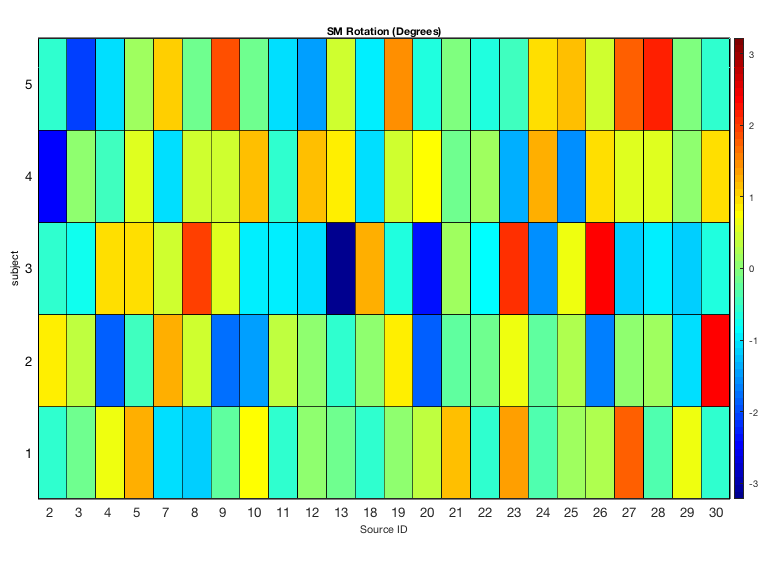

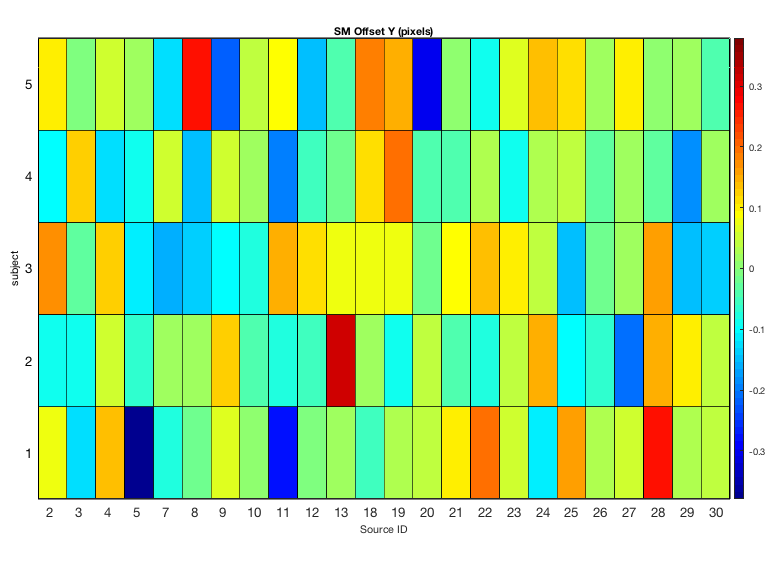

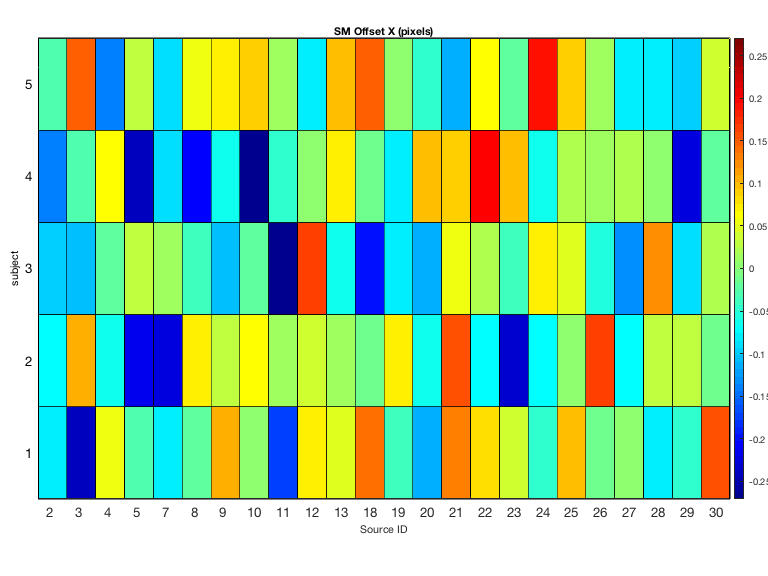

In [7]:
openfig('/Users/hose/Desktop/TFM_TECI/simulated_data/block_SM_translate_x.fig')
openfig('/Users/hose/Desktop/TFM_TECI/simulated_data/block_SM_translate_y.fig')
openfig('/Users/hose/Desktop/TFM_TECI/simulated_data/block_SM_theta.fig')
openfig('/Users/hose/Desktop/TFM_TECI/simulated_data/block_SM_spread.fig')

O el cambio porcentual respecto al baseline:

In [ ]:
f = openfig('/Users/hose/Desktop/TFM_TECI/simulated_data/block_D_pSC.fig', figsize=(10,10))

El resto de parámetros que no han sido introducidos también podrían ser visualizados, como el head-motion (la siguiente figura pertence a otro dataset simulado, se muestra con fines didácticos):

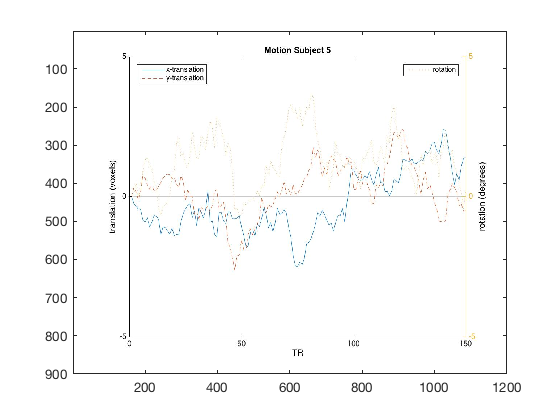

In [2]:
A = imread('/Users/hose/Desktop/TFM_TECI/simulated_data/aod_motion005.jpg');
image(A)

Por último, SimTB ofrece un múltiples herramientas para trabajar con la estructura de parámetros sP. Por ejemplo, podemos comprobar el aspecto que tienen las señales que están asociadas a la tarea antes de añadirles ruido y cualquier tipo de evento adicional. Es decir, el resultado de convolucionar el diseño por bloques con el modelo de generación de las TC (en este caso, la respuesta hemódinamica double-gamma HRF): 

In [ ]:
simtb_showTC(sP);

In [ ]:
off = zeros(1,30);
on = ones(1,20);
task = [off,on,off,on,off,on,off,on,off,on];
%csvwrite('task_design.csv', task)

plot(task, 'k--' ), hold on, 
plot(TC_block(:,16), 'g', 'linewidth',2), hold on, 
plot(TC_block(:,22), 'r', 'linewidth',2), hold on, 
plot(TC_block(:,23), 'm', 'linewidth',1), hold on, 
plot(TC_block(:,6),'b','linewidth',2)
axis([0 250 -1 1.3])
legend('Task', 'Motor', 'Auditivo', 'Hipocampo', 'DMN')
xlabel('Tiempo (en TRs)')
ylabel('Amplitud')
title('Tarea por bloques y respuesta')

In [6]:
openfig('/Users/hose/Desktop/TFM_TECI/simulated_data/task.fig')


ans = 

  Figure (1) with properties:

      Number: 1
        Name: ''
       Color: [0.9400 0.9400 0.9400]
    Position: [440 371 560 420]
       Units: 'pixels'

  Use GET to show all properties



Por último, podemos calcular el promedio de todos los sujetos y observar su matriz de correlaciones:

In [9]:
s = load('/Users/hose/Desktop/TFM_TECI/simulated_data/block_subject_001_SIM.mat');
tc1 = s.TC;
sm1 = s.SM;
cmtc1 = s.cmTC;
cmsm1 = s.cmSM;
s = load('/Users/hose/Desktop/TFM_TECI/simulated_data/block_subject_002_SIM.mat');
tc2 = s.TC;
sm2 = s.SM;
cmtc2 = s.cmTC;
cmsm2 = s.cmSM;
s = load('/Users/hose/Desktop/TFM_TECI/simulated_data/block_subject_003_SIM.mat');
tc3 = s.TC;
sm3 = s.SM;
cmtc3 = s.cmTC;
cmsm3 = s.cmSM;
s = load('/Users/hose/Desktop/TFM_TECI/simulated_data/block_subject_004_SIM.mat');
tc4 = s.TC;
sm4 = s.SM;
cmtc4 = s.cmTC;
cmsm4 = s.cmSM;
s = load('/Users/hose/Desktop/TFM_TECI/simulated_data/block_subject_005_SIM.mat');
tc5 = s.TC;
sm5 = s.SM;
cmtc5 = s.cmTC;
cmsm5 = s.cmSM;

tc_avg = (tc1+tc2+tc3+tc4+tc5)/5;
sm_avg = (sm1+sm2+sm3+sm4+sm5)/5;
cmtc_avg = (cmtc1+cmtc2+cmtc3+cmtc4+cmtc5)/5;
cmsm_avg = (cmsm1+cmsm2+cmsm3+cmsm4+cmsm5)/5;

In [10]:
pcolor(cmtc_avg)

La variabilidad que existía entre sujeto se pierde al promediar y aparecen altamente correlacionadas las regiones asociadas a la tarea mientras que la DMN (IC 8, que aquí aparece representada como la 6 porque algunas ICs como CSF o WM fueron eliminadas) aparece correlacionada negativamente con estas componentes.

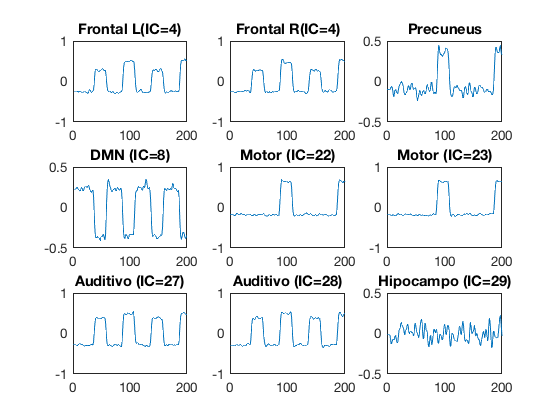

In [20]:
t = [1:200];
figure1=figure('Position', [1000, 1000, 1024, 1200]);
subplot(331), plot(t,tc_avg(t,3)), title('Frontal L(IC=4)') 
subplot(332), plot(t,tc_avg(t,4)), title('Frontal R(IC=4)')  
subplot(333), plot(t,tc_avg(t,5)), title('Precuneus')
subplot(334), plot(t,tc_avg(t,6)), title('DMN (IC=8)')    % Default Mode Network
subplot(335), plot(t,tc_avg(t,16)), title('Motor (IC=22)')
subplot(336), plot(t,tc_avg(t,17)), title('Motor (IC=23)')
subplot(337), plot(t,tc_avg(t,21)), title('Auditivo (IC=27)')
subplot(338), plot(t,tc_avg(t,22)), title('Auditivo (IC=28)')
subplot(339), plot(t,tc_avg(t,23)), title('Hipocampo (IC=29)')